In [1]:
!python

Python 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ] :: Anaconda, Inc. on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
>>> 

### Problem Statement: Predict whether income exceeds $50K/yr based on census data. Also known as the "Census Income" dataset

Adult income prediction


In [2]:
#Working with data on python libriries
import pandas as pd 
import numpy as np

#python visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#reading the data
df = pd.read_csv("/Users/syedaskari/Downloads/mu_sigma/Problem statement 1_dataset/adult.csv")

After reading the data lest do some analysis 

* lets classift wheather the data is numerical or categorical

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


lets convert the given numerical class

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

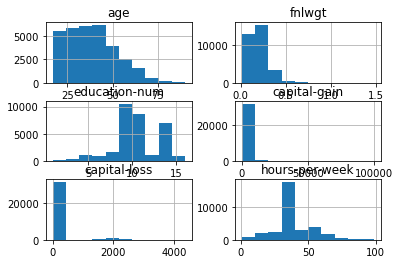

In [7]:

df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

In [8]:
#convert in into AGE bins
df['age'] = pd.cut(df['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])            

<AxesSubplot:xlabel='age', ylabel='count'>

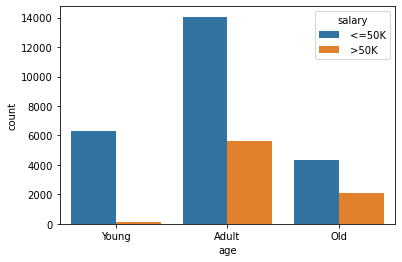

In [9]:
sns.countplot(x= 'age', hue='salary', data = df)

Hours Per week

In [10]:
df['hours-per-week'] = pd.cut(df['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

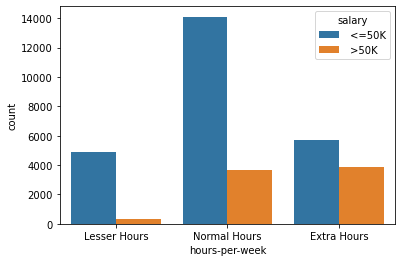

In [11]:
sns.countplot(x='hours-per-week' , hue='salary' , data=df)

Education

In [12]:
education_classes = df['education'].unique()


In [13]:
print(education_classes)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [14]:
education_marks = df['education-num'].unique()
print(education_marks)

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Education class and education are the same so lets drop the session

In [15]:
df.drop(['education-num'], axis = 1, inplace = True)



In [16]:
#
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

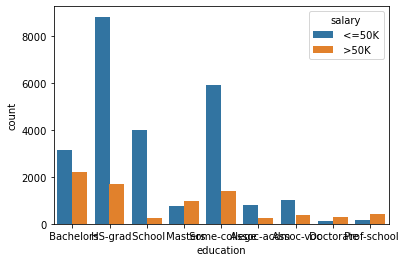

In [17]:
sns.countplot(x='education', hue='salary', data=df)

Material status

In [18]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [19]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [20]:
df.shape

(32561, 14)

Model creation

In [21]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Splitting the data

In [22]:
y = df['salary']
X = df.drop(['salary'], axis = 1)
X = pd.get_dummies(X)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_btrain)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Evaluating the model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png(